# PEC00025 - Introdução à Teoria de Vibrações:

## Trabalho 02

**Aluno:** Gabriel Orso Garcia - 00275506

**Data:** 30/04/2021



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MRPy import MRPy

## 1 - Importação dos Dados de Entrada:

Registro da aceleração na direção Z a ser utilizado como excitação:

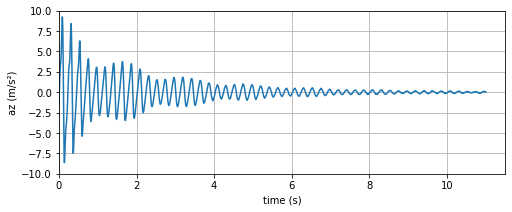

In [2]:
data = MRPy.from_file('T1_00275506_dados', form = 'invh').extract((2.5,13.5), by='time')
az = MRPy(data[2], data.fs)
t = az.t_axis()

plt.figure(1, figsize=(8,3), clear=1)
plt.plot(t, az[0])
plt.xlim(0,11.5)
plt.ylim(-10,10)
plt.xlabel('time (s)')
plt.ylabel('az (m/s²)')
plt.grid(True)

## 2 - Determinação da Frequência Natural do Sistema:

Frequência pico do espectro:  4.46 Hz
Esta será adotada como a frequência natural do sistema


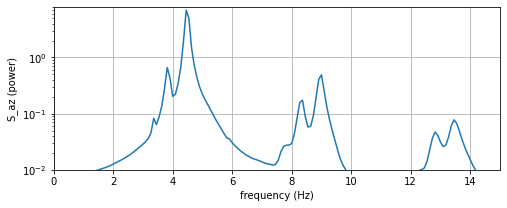

In [3]:
Saz,fs   = az.periodogram()
f        = az.f_axis()

plt.figure(2, figsize=(8,3), clear=1)
plt.semilogy(f, Saz[0])
plt.xlim(0, 15);   plt.xlabel('frequency (Hz)') 
plt.ylim(0.01,  8);   plt.ylabel('S_az (power)') 
plt.grid(1)

kf = Saz[0].argmax()
print('Frequência pico do espectro: {0:5.2f} Hz'.format(f[kf]))
print('Esta será adotada como a frequência natural do sistema')

## 3 - Aplicação da Excitação no sistema com 1 g.d.l:

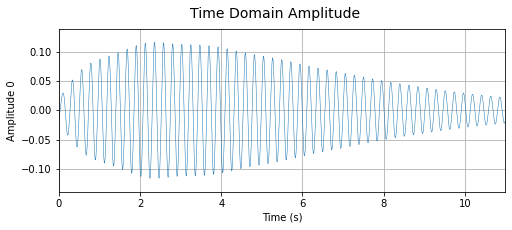

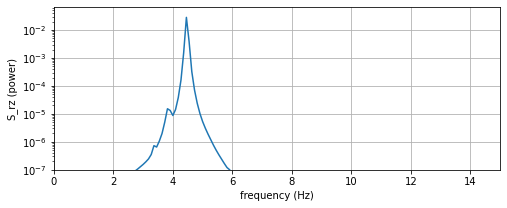

In [4]:
fn = f[kf]          # frequência natural do sistema
zt = 0.01           # razão de amortecimento

uF = az.sdof_Fourier(fn, zt)
uF.plot_time(3, figsize=(8,3))

Srz, fs = uF.periodogram()
frz = uF.f_axis()

# Gráfico da Frequência:
plt.figure(4, figsize=(8,3), clear=1)
plt.semilogy(frz, Srz[0])
plt.xlim(0, 15);   plt.xlabel('frequency (Hz)') 
plt.ylim(0.0000001,  0.068);   plt.ylabel('S_rz (power)') 
plt.grid(1)